In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
df_자영업 = pd.read_csv('C:/datafile/자영업폐업.csv')

df_확진자 = pd.read_csv('C:/datafile/서울시 코로나19 확진자 현황.csv')
df_방역수칙 = pd.read_csv('C:/datafile/방역수칙.csv')
df_음식카드 = pd.read_csv('C:/datafile/음식점 카드소비액.csv')

In [3]:
d = pd.date_range(start = '20200101', end = '20210831')
df = pd.DataFrame(index = d, columns = ['번호'])
df.head()

,번호
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN


In [4]:
df_자영업_cnt = df_자영업.groupby('폐업일자').count().iloc[:,:1]

In [5]:
df_자영업_날짜 = pd.to_datetime(list(map(str, df_자영업_cnt.index.to_list())))

In [6]:
df_자영업_cnt = df_자영업_cnt.reset_index()
df_자영업_cnt.index = df_자영업_날짜

In [7]:
df_자영업_cnt.폐업일자 = df_자영업_cnt.index.strftime("%Y%m%d").to_list()

In [8]:
df_자영업_cnt['년월'] = df_자영업_cnt['폐업일자'].str[:6]

In [9]:
l1 = ['202001','202002','202003','202004','202005','202006','202007','202008','202009','202010','202011','202012','202101','202102',
     '202103','202104','202105','202106','202107','202108','202109','202110','202111','202112']
l2 = ['20년01월', '20년02월', '20년03월', '20년04월', '20년05월', '20년06월', '20년07월', '20년08월', '20년09월', '20년10월', '20년11월',
     '20년12월', '21년01월', '21년02월', '21년03월', '21년04월', '21년05월', '21년06월', '21년07월', '21년08월', '21년09월', '21년10월',
     '21년11월', '21년12월']

In [10]:
df_자영업_cnt = df_자영업_cnt.replace(l1, l2)

In [11]:
df_자영업_cnt.columns = ['폐업일자', '폐업수', '폐업년월']

In [12]:
df_확진자_cnt = df_확진자.groupby('확진일').count().iloc[:,:1]

In [13]:
df_확진자_날짜 = pd.to_datetime(df_확진자_cnt.index.to_list())

df_확진자_cnt.index = df_확진자_날짜

In [14]:
df_확진자_cnt['확진날짜'] = df_확진자_cnt.index.strftime('%Y%m%d').to_list()

In [15]:
df_확진자_cnt['년월'] = df_확진자_cnt['확진날짜'].str[:6]

In [16]:
df_확진자_cnt.columns = ['확진자수', '확진일자', '확진년월']

In [17]:
df_확진자_cnt

,확진자수,확진일자,확진년월
2020-01-24,1,20200124,202001
2020-01-30,3,20200130,202001
2020-01-31,3,20200131,202001
2020-02-02,1,20200202,202002
2020-02-05,2,20200205,202002
...,...,...,...
2021-09-08,667,20210908,202109
2021-09-09,670,20210909,202109
2021-09-10,659,20210910,202109
2021-09-11,658,20210911,202109


In [18]:
df = df.reset_index()
df_확진자_cnt = df_확진자_cnt.reset_index()
df_자영업_cnt = df_자영업_cnt.reset_index()

In [19]:
df2 = pd.merge(df, df_확진자_cnt.iloc[:,:2], on = 'index', how = 'outer')

In [20]:
df3 = pd.merge(df2, df_자영업_cnt[['index', '폐업수']], on = 'index', how = 'outer')

In [21]:
df4 = df3.set_index('index').iloc[:,1:].fillna(0)

In [22]:
df4['날짜'] = df4.index.strftime('%Y%m%d').to_list()
df4['년월'] = df4['날짜'].str[:6]

In [23]:
df4 = df4.replace(l1, l2)

In [24]:
df4 = df4.drop('날짜', axis = 1)

In [25]:
df4 = df4.iloc[:609]

In [43]:
df4[60:90]

,확진자수,폐업수,년월
index,,,
2020-03-01,5.0,0.0,20년03월
2020-03-02,6.0,215.0,20년03월
2020-03-03,0.0,88.0,20년03월
2020-03-04,7.0,70.0,20년03월
2020-03-05,1.0,71.0,20년03월
2020-03-06,7.0,54.0,20년03월
2020-03-07,7.0,0.0,20년03월
2020-03-08,10.0,1.0,20년03월
2020-03-09,26.0,74.0,20년03월


In [26]:
df_방역수칙[df_방역수칙['구분'] == '사적모임']

,시작일시,종료일시,단계,구분,18시 이전,18시 이후,시간제한
0,2020-03-23,2020-08-15,1,사적모임,inf,inf,inf
2,2020-08-16,2020-08-31,2,사적모임,9.0,9.0,24.0
4,2020-09-01,2020-09-13,2.5,사적모임,9.0,9.0,21.0
6,2020-09-14,2020-10-11,2,사적모임,100.0,100.0,24.0
8,2020-10-12,2020-11-06,1,사적모임,inf,inf,inf
10,2020-11-07,2020-11-18,1,사적모임,inf,inf,inf
12,2020-11-19,2020-11-30,2,사적모임,9.0,9.0,21.0
14,2020-12-01,2020-12-07,2A,사적모임,10.0,10.0,21.0
16,2020-12-08,2021-01-02,2.5,사적모임,10.0,10.0,21.0
18,2021-01-03,2021-02-07,2.5,사적모임,5.0,5.0,22.0


In [27]:
df_음식카드

,일자,카드소비액
0,20200101,"1,267,929"
1,20200102,"1,267,929"
2,20200103,"1,267,929"
3,20200104,"1,267,929"
4,20200105,"1,267,929"
...,...,...
542,20210626,"1,102,066"
543,20210627,"1,102,066"
544,20210628,"1,102,066"
545,20210629,"1,102,066"


In [28]:
d = pd.DataFrame(np.zeros(62))
d.columns = ['카드소비액']
d

,카드소비액
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
57,0.0
58,0.0
59,0.0
60,0.0


In [29]:
d.index = pd.date_range(start = '2021-07-01', end = '2021-08-31')

In [30]:
d.index = d.index.strftime('%Y%m%d').to_list()
d

,카드소비액
20210701,0.0
20210702,0.0
20210703,0.0
20210704,0.0
20210705,0.0
...,...
20210827,0.0
20210828,0.0
20210829,0.0
20210830,0.0


In [31]:
df_음식카드 = df_음식카드.set_index('일자')

In [32]:
df_음식카드 = pd.concat([df_음식카드, d])

In [33]:
l_사적모임 = ['2020-03-23', '2020-08-16', '2020-09-01', '2020-09-14', '2020-10-12', '2020-11-07', '2020-11-19',
         '2020-12-01', '2020-12-08', '2021-01-03', '2021-02-14', '2021-07-01', '2021-07-15', '2021-08-23']

In [34]:
l_사적모임_ind = []
for d in l_사적모임:
    l_사적모임_ind.append(df[df['index'] == d].index)
    
l_사적모임_ind

[Int64Index([82], dtype='int64'),
 Int64Index([228], dtype='int64'),
 Int64Index([244], dtype='int64'),
 Int64Index([257], dtype='int64'),
 Int64Index([285], dtype='int64'),
 Int64Index([311], dtype='int64'),
 Int64Index([323], dtype='int64'),
 Int64Index([335], dtype='int64'),
 Int64Index([342], dtype='int64'),
 Int64Index([368], dtype='int64'),
 Int64Index([410], dtype='int64'),
 Int64Index([547], dtype='int64'),
 Int64Index([561], dtype='int64'),
 Int64Index([600], dtype='int64')]

In [35]:
df_음식카드['카드소비액'] = df_음식카드['카드소비액'].str.replace(',', '')

In [36]:
df_음식카드 = df_음식카드.fillna(0)

In [37]:
df_음식카드['카드소비액'] = df_음식카드['카드소비액'].astype('int')

In [38]:
plt.style.use('seaborn-white')
plt.rc('font', family = 'Malgun Gothic')

Text(0.5, 1.0, '일별 폐업수 및 확진자수 추이')

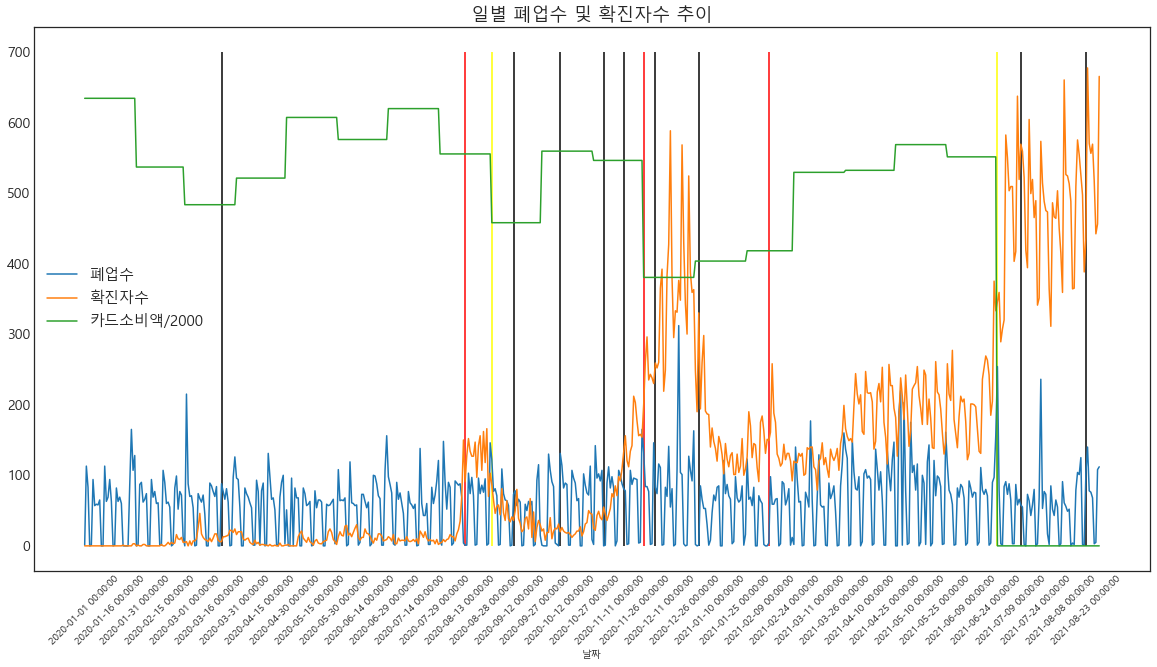

In [39]:
l = df4.shape[0]
r = np.arange(l)

plt.figure(figsize = (20, 10))

plt.plot(r, df4['폐업수'], label = '폐업수')
plt.plot(r, df4['확진자수'], label = '확진자수')
plt.plot(r, df_음식카드['카드소비액']/2000, label = '카드소비액/2000')

plt.vlines(x = 82, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 228, ymin = 0, ymax = 700, colors = 'red')
plt.vlines(x = 244, ymin = 0, ymax = 700, colors = 'yellow')
plt.vlines(x = 257, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 285, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 311, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 323, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 335, ymin = 0, ymax = 700, colors = 'red')
plt.vlines(x = 342, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 368, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 410, ymin = 0, ymax = 700, colors = 'red')
plt.vlines(x = 547, ymin = 0, ymax = 700, colors = 'yellow')
plt.vlines(x = 561, ymin = 0, ymax = 700, colors = 'black')
plt.vlines(x = 600, ymin = 0, ymax = 700, colors = 'black')

plt.xticks(r[::15], df4.index[::15], rotation = 45, fontsize = 10)
plt.yticks(fontsize = 14)
plt.xlabel('날짜')
plt.legend(fontsize = 15)
plt.title('일별 폐업수 및 확진자수 추이', fontsize = 18)